# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [2]:
# import libraries
import pandas as pd
import nltk
from sqlalchemy import create_engine
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.externals import joblib


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adrianlievano/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/adrianlievano/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adrianlievano/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/Users/adrianlievano/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
# load data from database
engine = create_engine('sqlite:///InsertDatabaseName.db')
df = pd.read_sql_table('InsertTableName', engine)
X = df['message']
Y = df.loc[:, df.columns != 'message'].drop(['id', 'genre','original'], axis = 1)

In [4]:
df.shape

(26216, 40)

In [5]:
Y.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
x = list(Y.columns)
x

['related',
 'request',
 'offer',
 'aid_related',
 'medical_help',
 'medical_products',
 'search_and_rescue',
 'security',
 'military',
 'child_alone',
 'water',
 'food',
 'shelter',
 'clothing',
 'money',
 'missing_people',
 'refugees',
 'death',
 'other_aid',
 'infrastructure_related',
 'transport',
 'buildings',
 'electricity',
 'tools',
 'hospitals',
 'shops',
 'aid_centers',
 'other_infrastructure',
 'weather_related',
 'floods',
 'storm',
 'fire',
 'earthquake',
 'cold',
 'other_weather',
 'direct_report']

In [7]:
X.head()[0]


'Weather update - a cold front from Cuba that could pass over Haiti'

### 2. Write a tokenization function to process your text data

In [8]:
def tokenize(text):
    tokens = word_tokenize(text)
    stop_words = stopwords.words('english')
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    clean_tokens = []
    
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)
        
    return clean_tokens

In [9]:
tokenize(X.head()[0])

['weather', 'update', '-', 'cold', 'front', 'cuba', 'could', 'pas', 'haiti']

In [27]:
CountVectorizer(tokenize(X.head()[0]))

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8',
        input=['weather', 'update', '-', 'cold', 'front', 'cuba', 'could', 'pas', 'haiti'],
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [10]:
pipeline = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenize)),
    ('tfidf', TfidfTransformer()),
    ('clf', MultiOutputClassifier(RandomForestClassifier()))
])

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.10)

cv = pipeline.fit(X_train, y_train)

KeyboardInterrupt: 

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [11]:
from sklearn.metrics import classification_report

y_pred = cv.predict(X_test)
y_pred_df = pd.DataFrame(y_pred, columns = Y.columns)
for column in Y.columns:
    print('\n---- {} ----\n{}\n'.format(column, classification_report(y_test[column], y_pred_df[column])))

    

/Users/adrianlievano/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):



---- related ----
             precision    recall  f1-score   support

          0       0.64      0.42      0.51       631
          1       0.82      0.93      0.87      1966
          2       0.75      0.12      0.21        25

avg / total       0.78      0.80      0.78      2622



---- request ----
             precision    recall  f1-score   support

          0       0.90      0.98      0.94      2182
          1       0.81      0.44      0.57       440

avg / total       0.88      0.89      0.87      2622



---- offer ----
             precision    recall  f1-score   support

          0       0.99      1.00      1.00      2606
          1       0.00      0.00      0.00        16

avg / total       0.99      0.99      0.99      2622



---- aid_related ----
             precision    recall  f1-score   support

          0       0.75      0.85      0.80      1556
          1       0.73      0.60      0.66      1066

avg / total       0.74      0.75      0.74      2622



----

/Users/adrianlievano/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
pipeline.get_params()

{'clf': MultiOutputClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
             verbose=0, warm_start=False),
            n_jobs=1),
 'clf__estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
             verbose=0, warm_start=False),
 'clf__estimator__bootstrap': True,
 'clf__estimator__class_weight': None,
 'clf__estimator__criterion': 'gini',
 'clf__estimator__max_depth

### 6. Improve your model
Use grid search to find better parameters. 

In [22]:
parameters = {
        'clf__estimator__n_estimators': [50, 100, 200],
        #'clf__estimator__min_samples_split': [2, 3, 4, 10]
    }

cv_opt = GridSearchCV(pipeline, param_grid=parameters)

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [23]:
cv_opt.fit(X_train, y_train)
y_pred_opt = cv_opt.predict(X_test)
y_pred_opt_df = pd.DataFrame(y_pred_opt, columns = Y.columns)
for column in Y.columns:
    print('\n---- {} ----\n{}\n'.format(column, classification_report(y_test[column], y_pred_df[column])))



/Users/adrianlievano/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/adrianlievano/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/adrianlievano/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issub


---- related ----
             precision    recall  f1-score   support

          0       0.64      0.42      0.51       631
          1       0.82      0.93      0.87      1966
          2       0.75      0.12      0.21        25

avg / total       0.78      0.80      0.78      2622



---- request ----
             precision    recall  f1-score   support

          0       0.90      0.98      0.94      2182
          1       0.81      0.44      0.57       440

avg / total       0.88      0.89      0.87      2622



---- offer ----
             precision    recall  f1-score   support

          0       0.99      1.00      1.00      2606
          1       0.00      0.00      0.00        16

avg / total       0.99      0.99      0.99      2622



---- aid_related ----
             precision    recall  f1-score   support

          0       0.75      0.85      0.80      1556
          1       0.73      0.60      0.66      1066

avg / total       0.74      0.75      0.74      2622



----

/Users/adrianlievano/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

In [24]:
cv_opt.best_params_

{'clf__estimator__n_estimators': 200}

In [25]:
cv_opt.best_score_

0.2525642112401458

### 9. Export your model as a pickle file

In [ ]:
from sklearn.externals import joblib
joblib.dump(cv_opt.best_estimator_, '19112019_nlp_model.pkl')

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.

In [12]:
df

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,14,Information about the National Palace-,Informtion au nivaux palais nationl,direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,15,Storm at sacred heart of jesus,Cyclone Coeur sacr de jesus,direct,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
7,16,"Please, we need tents and water. We are in Sil...",Tanpri nou bezwen tant avek dlo nou zon silo m...,direct,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
8,17,"I would like to receive the messages, thank you",Mwen ta renmen jouin messag yo. Merci,direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,18,I am in Croix-des-Bouquets. We have health iss...,"Nou kwadebouke, nou gen pwoblem sant m yo nan ...",direct,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1


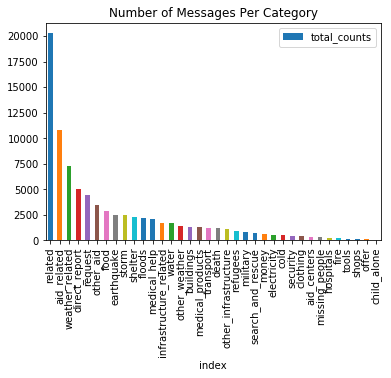

In [17]:
target_columns = x

g = pd.DataFrame(df[target_columns].sum().sort_values(ascending = False))
g = g.reset_index()
g['total_counts'] = g[0]
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
g.plot.bar(x = 'index', y = 'total_counts', title = 'Number of Messages Per Category')
plt.show()

In [33]:
len(X[0].split(' '))

13

In [42]:
df['message_length'] = df['message'].str.split(' ').apply(len)

In [53]:
df['message_length'].sort_values(ascending = False)

20844    1686
16032    1685
25101    1076
19392    1071
13864     995
24810     984
20649     934
17328     924
24930     848
15120     805
21076     778
15909     759
20761     737
16835     670
14704     663
15828     647
22889     641
17277     634
20668     631
13671     627
22211     582
14731     540
16135     539
22003     538
21512     521
22794     496
22604     494
14734     483
23054     482
15838     470
         ... 
9510        4
4866        4
12772       4
17340       4
7975        4
3406        4
17878       4
12384       4
8850        3
1472        3
1687        3
24281       3
12254       3
7682        3
20543       3
6335        3
25786       3
8376        2
7343        2
7388        2
21543       2
5969        2
8687        2
21433       2
6788        2
15701       1
22708       1
21720       1
16532       1
22498       1
Name: message_length, Length: 26216, dtype: int64

In [44]:
df['message_length'].describe()

count    26216.000000
mean        24.142585
std         32.134663
min          1.000000
25%         14.000000
50%         21.000000
75%         30.000000
max       1686.000000
Name: message_length, dtype: float64

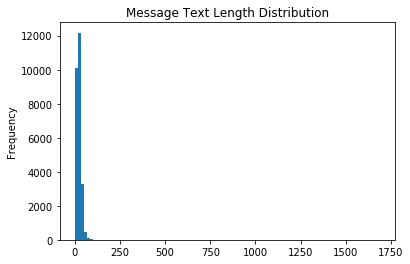

In [55]:
df['message_length'].plot.hist(
    bins=100,
    title='Message Text Length Distribution')

plt.show()